In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

# Specify the folder path where the data files are located
folder_path = r"Jan_30_Clean_Data"

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]


termiator_noise_file = "Jan_30_338_50Ohm_Metal.csv"
file_path = os.path.join(folder_path, termiator_noise_file)
df = pd.read_csv(file_path)

labels = ['1.4925 MOhm','250 KOhm','510 KOhm','998 KOhm']

resistances = [1.4981e6,0.998e6, 510e3, 250e3] #Omitted the 50 ohm value

frequencies = np.linspace(200, 1000, 1000)  # 10 Hz to 10 kHz

# Function to calculate thermal noise PSD
def thermal_noise_psd(R):
    return np.sqrt(4 * (1.38e-23)  * (22.5+273.15) * R)

Jan_30_Clean_Data\Jan_30_338_14925KOhm_Metal.csv
Measured mean noise 1.4466666666666667e-07
Theortical Noise 1.563611595889465e-07


Jan_30_Clean_Data\Jan_30_338_250KOhm_Metal.csv
Measured mean noise 6.476666666666666e-08
Theortical Noise 1.276214724879791e-07


Jan_30_Clean_Data\Jan_30_338_510KOhm_Metal.csv
Measured mean noise 8.86e-08
Theortical Noise 9.123123807117822e-08


Jan_30_Clean_Data\Jan_30_338_998KOhm_Metal.csv
Measured mean noise 1.2000000000000002e-07
Theortical Noise 6.387464285614441e-08


6.206666666666667e-09


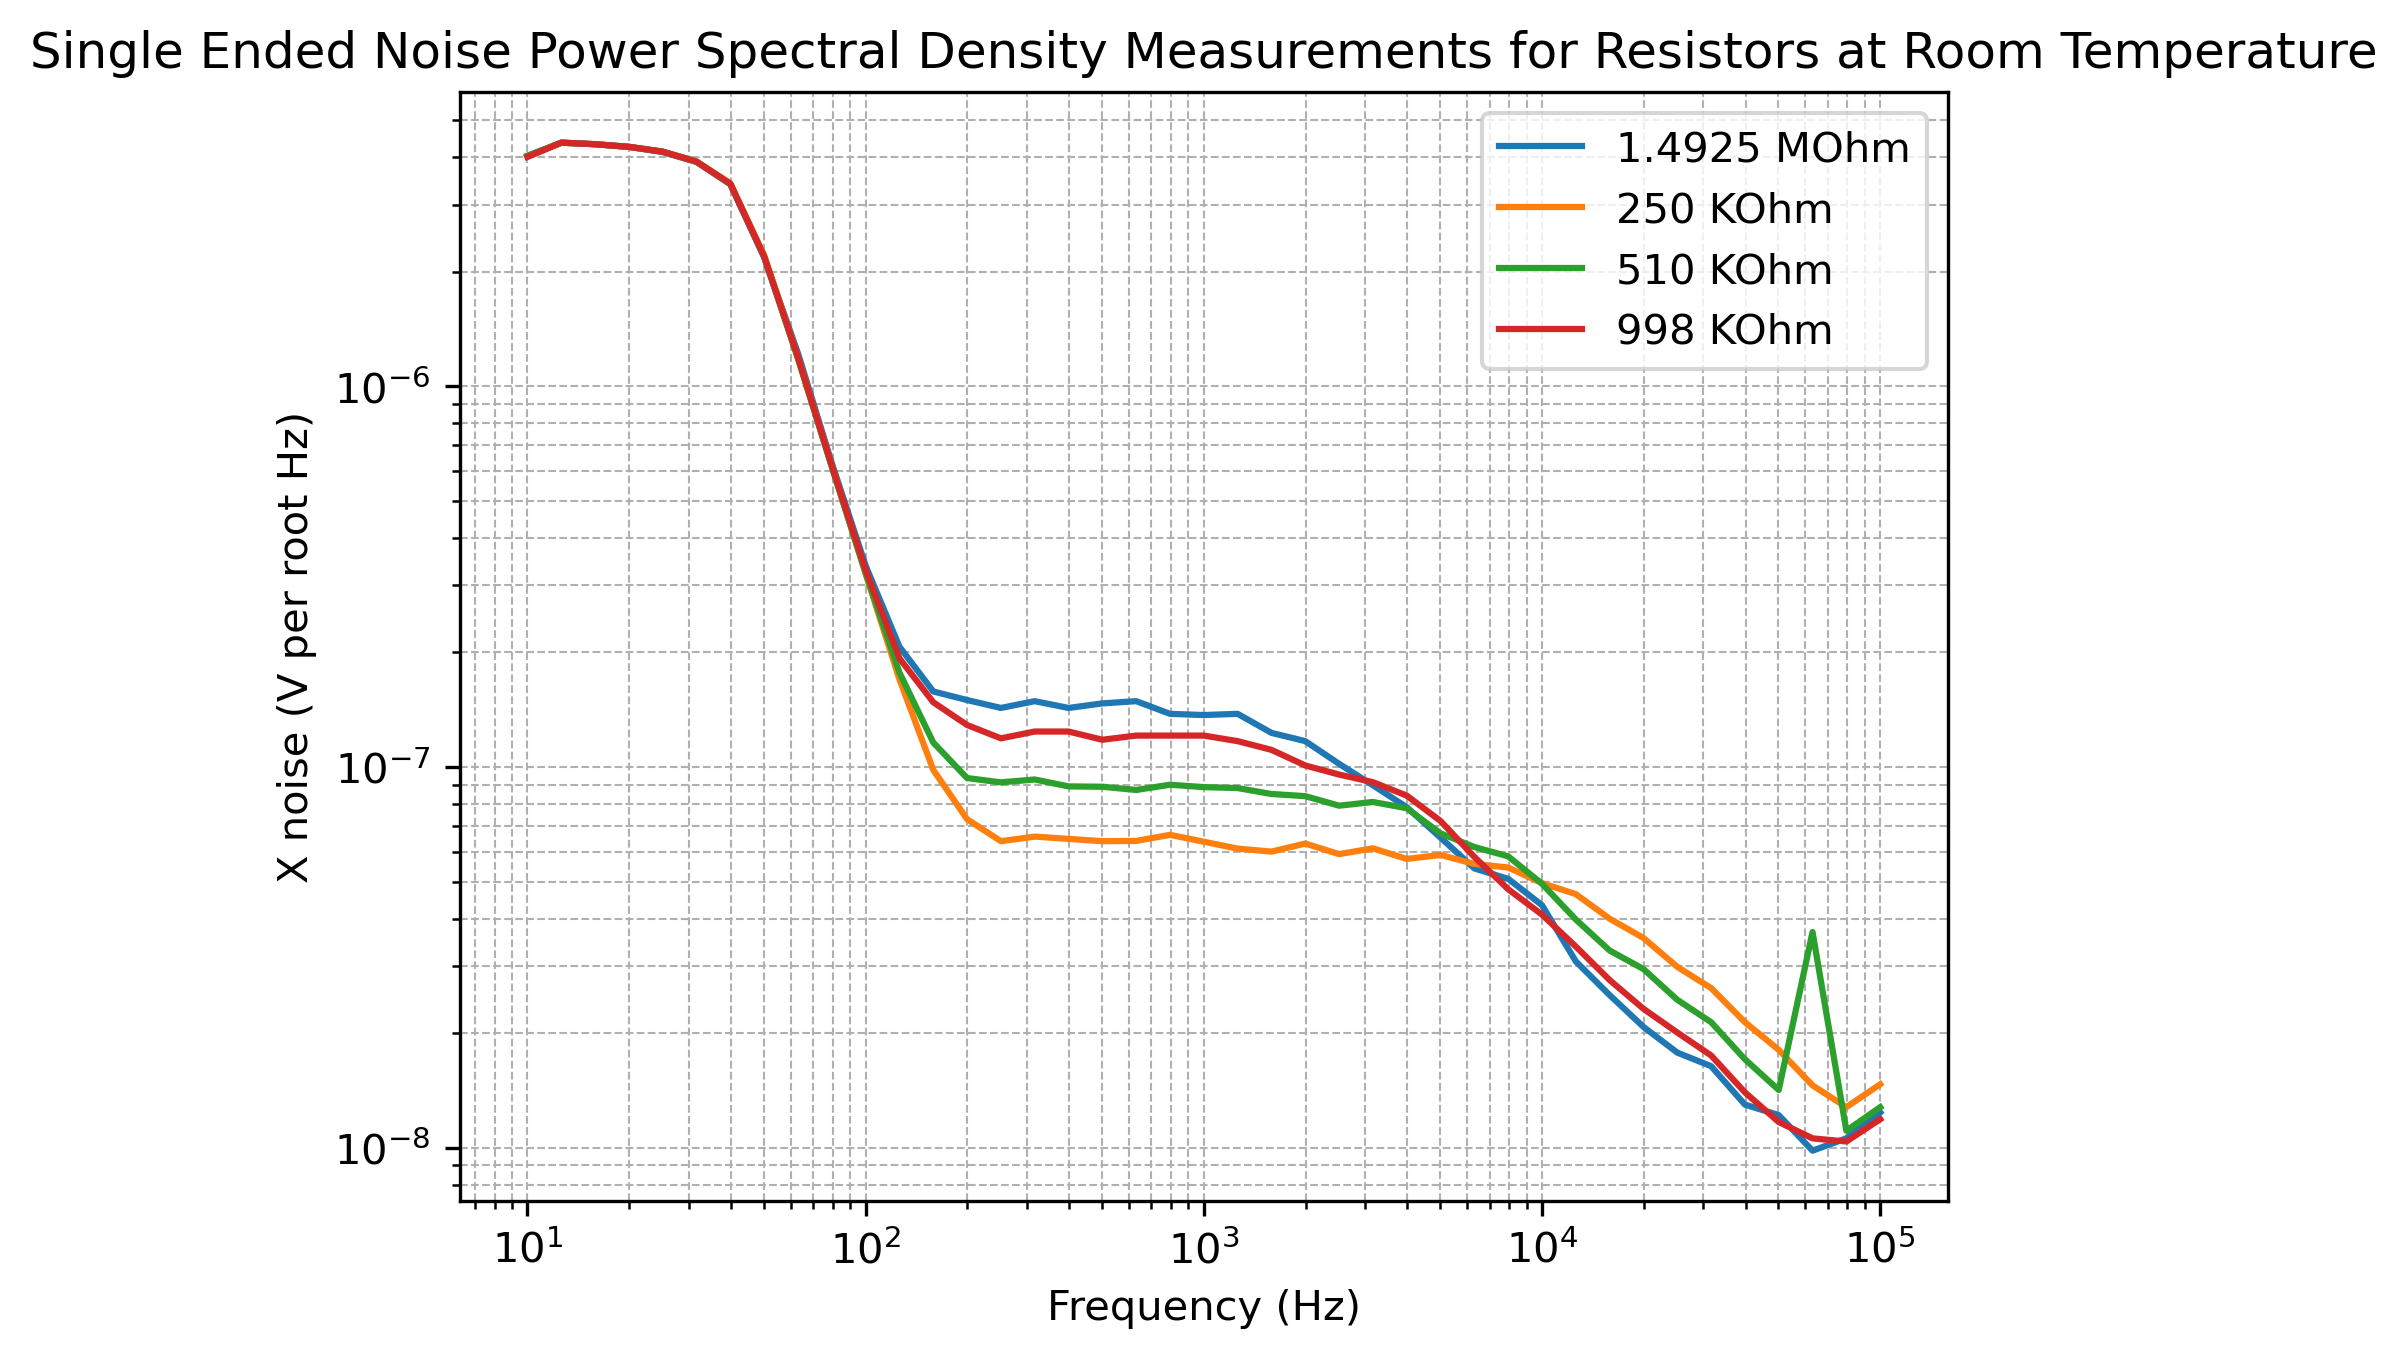

In [15]:
# Loop through each CSV file and plot the data

avg_values = []

i = 0

terminatorNoise = df['X noise (V per root Hz) - Plot 0']

mean_term_noise = np.average(terminatorNoise[17:20])

for file in csv_files:

    if (file != termiator_noise_file):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)

        x_values = df['Frequency (Hz) - Plot 0']
        y_values = df['X noise (V per root Hz) - Plot 0']

        avg_values.append(np.average(y_values[17:20]))
        R = resistances[i]
        plt.loglog(x_values, y_values, label=labels[i])
        #plt.loglog(frequencies,np.ones(len(frequencies))*thermal_noise_psd(R),'k--')

        print(file_path)
        print('Measured mean noise', np.average(y_values[17:20]))
        print('Theortical Noise', thermal_noise_psd(R))
        print('\n')

        i += 1


print(mean_term_noise)


plt.xlabel('Frequency (Hz)')
plt.ylabel('X noise (V per root Hz)')
plt.title('Single Ended Noise Power Spectral Density Measurements for Resistors at Room Temperature')

plt.legend()

# Set log scale for grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xscale('log')
plt.yscale('log')

#plt.xlim(200,1000)
plt.show()


In [27]:
avg_values = np.array(avg_values)
avg_values = np.sort(avg_values)

resistances = [250*10**3,510*10**3,998*10**3,1498*10**3]

Slope of the line: 1.3387551142409465e-20


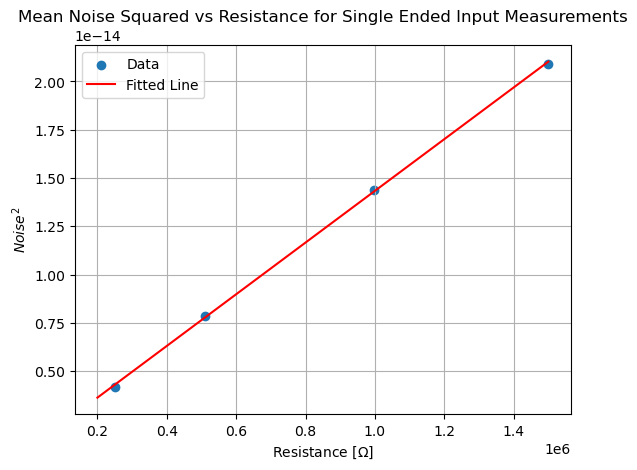

In [28]:
avg_squared = avg_values**2

# Fit a linear regression line (1st-degree polynomial)
coefficients = np.polyfit(resistances, avg_squared, 1)

# The first coefficient represents the slope of the line
slope = coefficients[0]

print("Slope of the line:", slope)

x = np.linspace(200*10**3,1500*10**3)
# Generate predicted values for the fitted line
predicted_y = np.polyval(coefficients, x)

# Plot the data points and the fitted line
plt.scatter(resistances,avg_squared , label='Data')
plt.plot(x, predicted_y, label='Fitted Line', color='red')
plt.xlabel('Resistance [$\Omega$]')
plt.ylabel('$Noise^2$')
plt.legend()
plt.grid(True)
plt.title('Mean Noise Squared vs Resistance for Single Ended Input Measurements')
plt.show()

In [29]:
four_k_t_measured = slope
four_k_t_actual = 4*1.38*10**-23*295.5

percent_error = np.abs((four_k_t_measured - four_k_t_actual) / four_k_t_actual) * 100
print(percent_error)

17.926192756017397


In [11]:
Boltzmann_const = slope/(4*(273+21.6))

In [60]:
print(slope)

1.3860045266659647e-20
